# 1A. Spatial Resolution

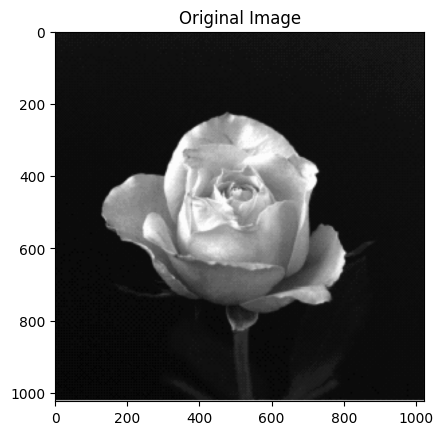

In [1]:
import cv2
import matplotlib.pyplot as plt

# Image Read
img = cv2.imread("./Images/1A_SpatialResolution.png")

# Turn into Gray
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Resize to 1024x1024
img = cv2.resize(img,(1024,1024))

# Showing image
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.show()

In [2]:
# Decrease Spatial Resolution
def downsample(imgg,decrease_by):
    new_img = []
    height,width = imgg.shape

    for i in range(0,height,decrease_by):
        temp_row = []
        for j in range(0,width,decrease_by):
            temp_row.append(imgg[i][j])
        new_img.append(temp_row)

    return new_img

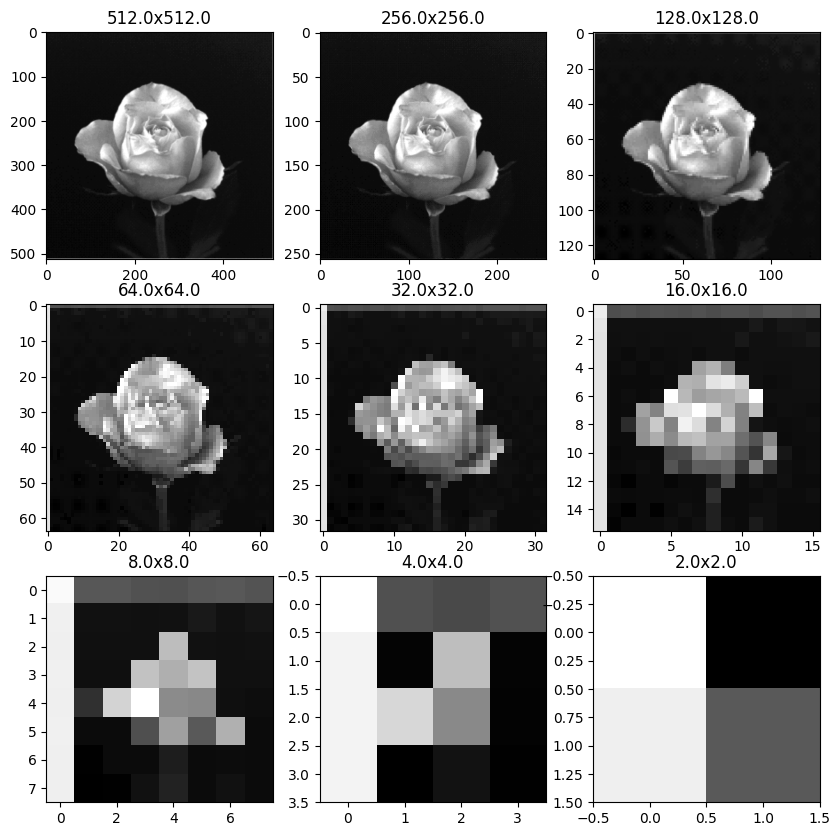

In [3]:
# Final Output Show
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(downsample(img,2**i),cmap='gray')
    plt.title(f"{1024/2**i}x{1024/2**i}")

plt.show()


# 1B. Intensity Resolution

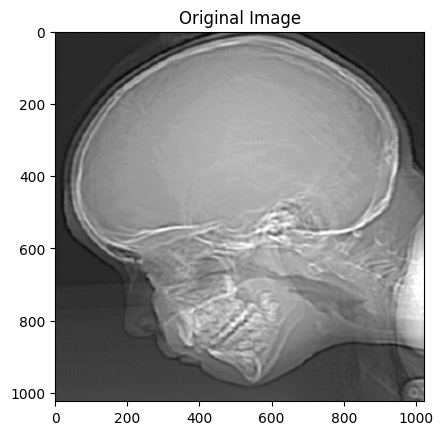

In [4]:
import cv2
import matplotlib.pyplot as plt

# Image Read
img = cv2.imread("./Images/1B_IntensityResolution.png")

# Turn into Gray
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Resize to 1024x1024
img = cv2.resize(img,(1024,1024))

# Showing image
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.show()

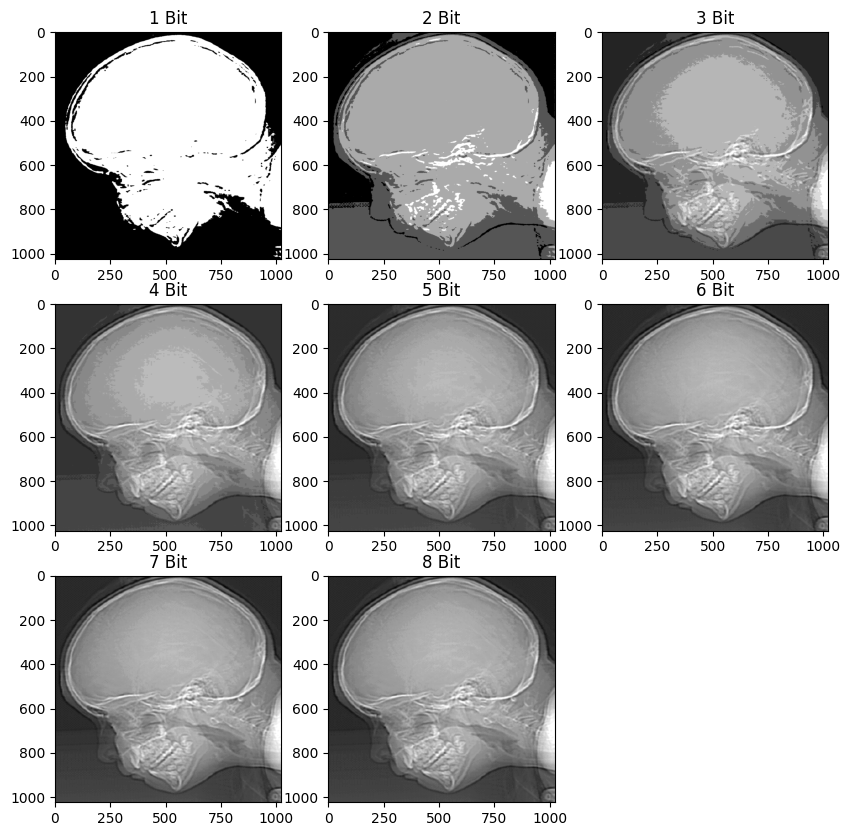

In [5]:
# Final Output Show
import numpy as np
img = img/255

plt.figure(figsize=(10,10))

for i in range(8,0,-1):
    plt.subplot(3,3,i)
    plt.title(f"{i} Bit")
    new_image = np.floor(img*(2**i))
    plt.imshow(new_image,cmap='gray')

plt.show()


# 1C. Histogram and Thresholding

In [6]:
import cv2
import matplotlib.pyplot as plt

# Image Read
img = cv2.imread("./Images/1C_Thresholding_Card.png")

# Turn into Gray
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Resize to 1024x1024
img = cv2.resize(img,(1024,1024))

In [7]:
def show_histogram(imgg):
    occurance = {}

    for row in imgg:
        for value in row:
            if value in occurance:
                occurance[value]+=1
            else:
                occurance[value]=1

    occurance = dict(sorted(occurance.items()))
    plt.bar(occurance.keys(),occurance.values())

    return occurance


{0: 60948, 255: 987628}

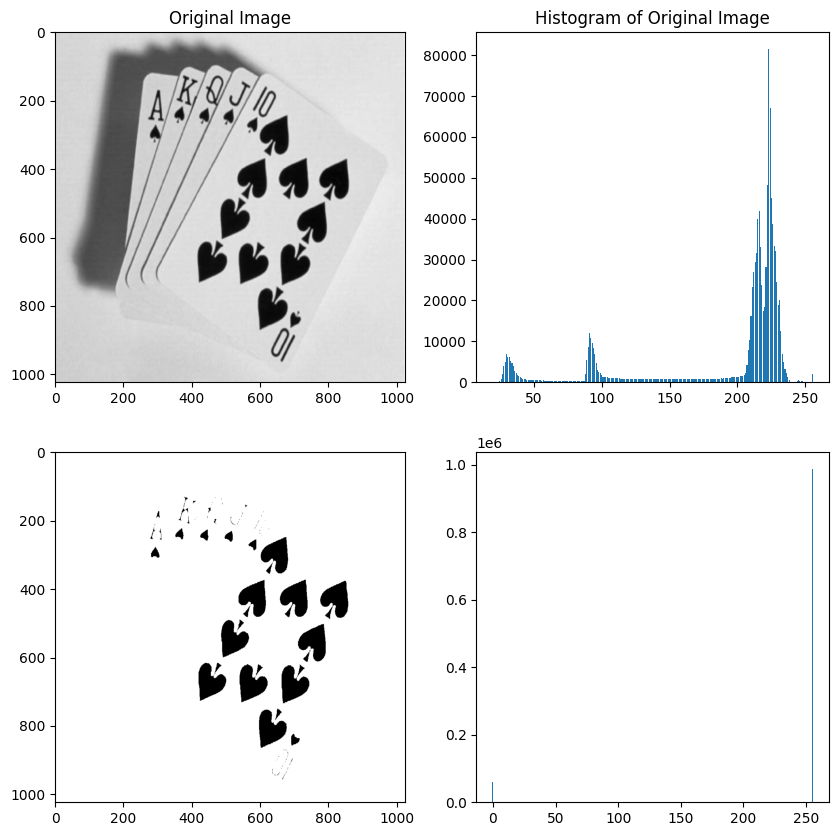

In [8]:
plt.figure(figsize=(10,10))

#Original Image
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")

#Histogram of Original Image
plt.subplot(2,2,2)
show_histogram(img)
plt.title("Histogram of Original Image")

# Thresholded Image
plt.subplot(2,2,3)
img[img<50] = 0
img[img>=50] = 255
plt.imshow(img,cmap='gray')

# Thresholded Image Histogram
plt.subplot(2,2,4)
show_histogram(img)
 